In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('data/BlackFriday.csv')

# Data Exploration

In [23]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [25]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [26]:
# Cantidad de productos diferentes
print("Product amount: ", len(df["Product_ID"].value_counts()))

Product amount:  3623


# Variable Analysis

In [27]:
# Functions

# Reliza un gráfico dadas dos variables y el tipo de gráfico a realizar
def plt_plot(group, column, plot):
    ax = plt.figure(figsize = (12, 6))
    df.groupby(group)[column].sum().sort_values().plot(plot)
    
def sns_plot(column):
    sns.countplot(df[column])

## Gender

In [28]:
# Cantidad de Hombres y Mujeres unicos que compraron
gender_df = df.copy()
gender_unique = gender_df.groupby(['User_ID','Gender'])['Gender'].count().groupby(['Gender']).count()
gender_unique

Gender
F    1666
M    4225
Name: Gender, dtype: int64

In [29]:
# TODO plot

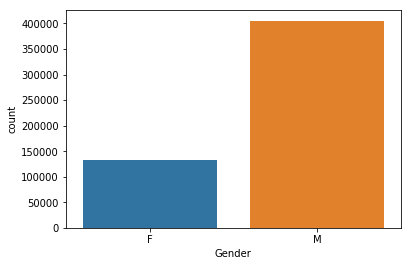

In [30]:
sns_plot("Gender")

In [31]:
# Cantidad de compras realizadas por Hombres (M) y Mujeres (F)
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

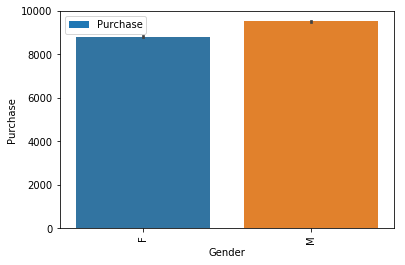

In [32]:
# Dinero promedio gastado por genero
gender_df = df.copy()
gender_purchase_merge = gender_df[['Gender', 'Purchase']].groupby("Gender").mean()
gender_purchase_merge.plot.bar()

sns.barplot("Gender", "Purchase", data = gender_df)
plt.show()

In [33]:
gender_purchase_merge

,Purchase
Gender,
F,8809.761349
M,9504.771713


## Age

## Occupation

In [34]:
df["Occupation"].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [61]:
occupation_df = df.copy()
occupation_df.drop(['User_ID', 'Marital_Status', 'Product_Category_2', 'Product_Category_3', 'Stay_In_Current_City_Years', 'Product_ID', 'City_Category'], axis=1, inplace=True)
occupation_df = occupation_df.groupby(["Occupation", "Product_Category_1"]).sum().reset_index()
occupation_df

,Occupation,Product_Category_1,Purchase
0,0,1,231782393
1,0,2,32948881
2,0,3,26167650
3,0,4,3482490
4,0,5,115849222
5,0,6,39801649
6,0,7,8894329
7,0,8,103444552
8,0,9,754498
9,0,10,12280732


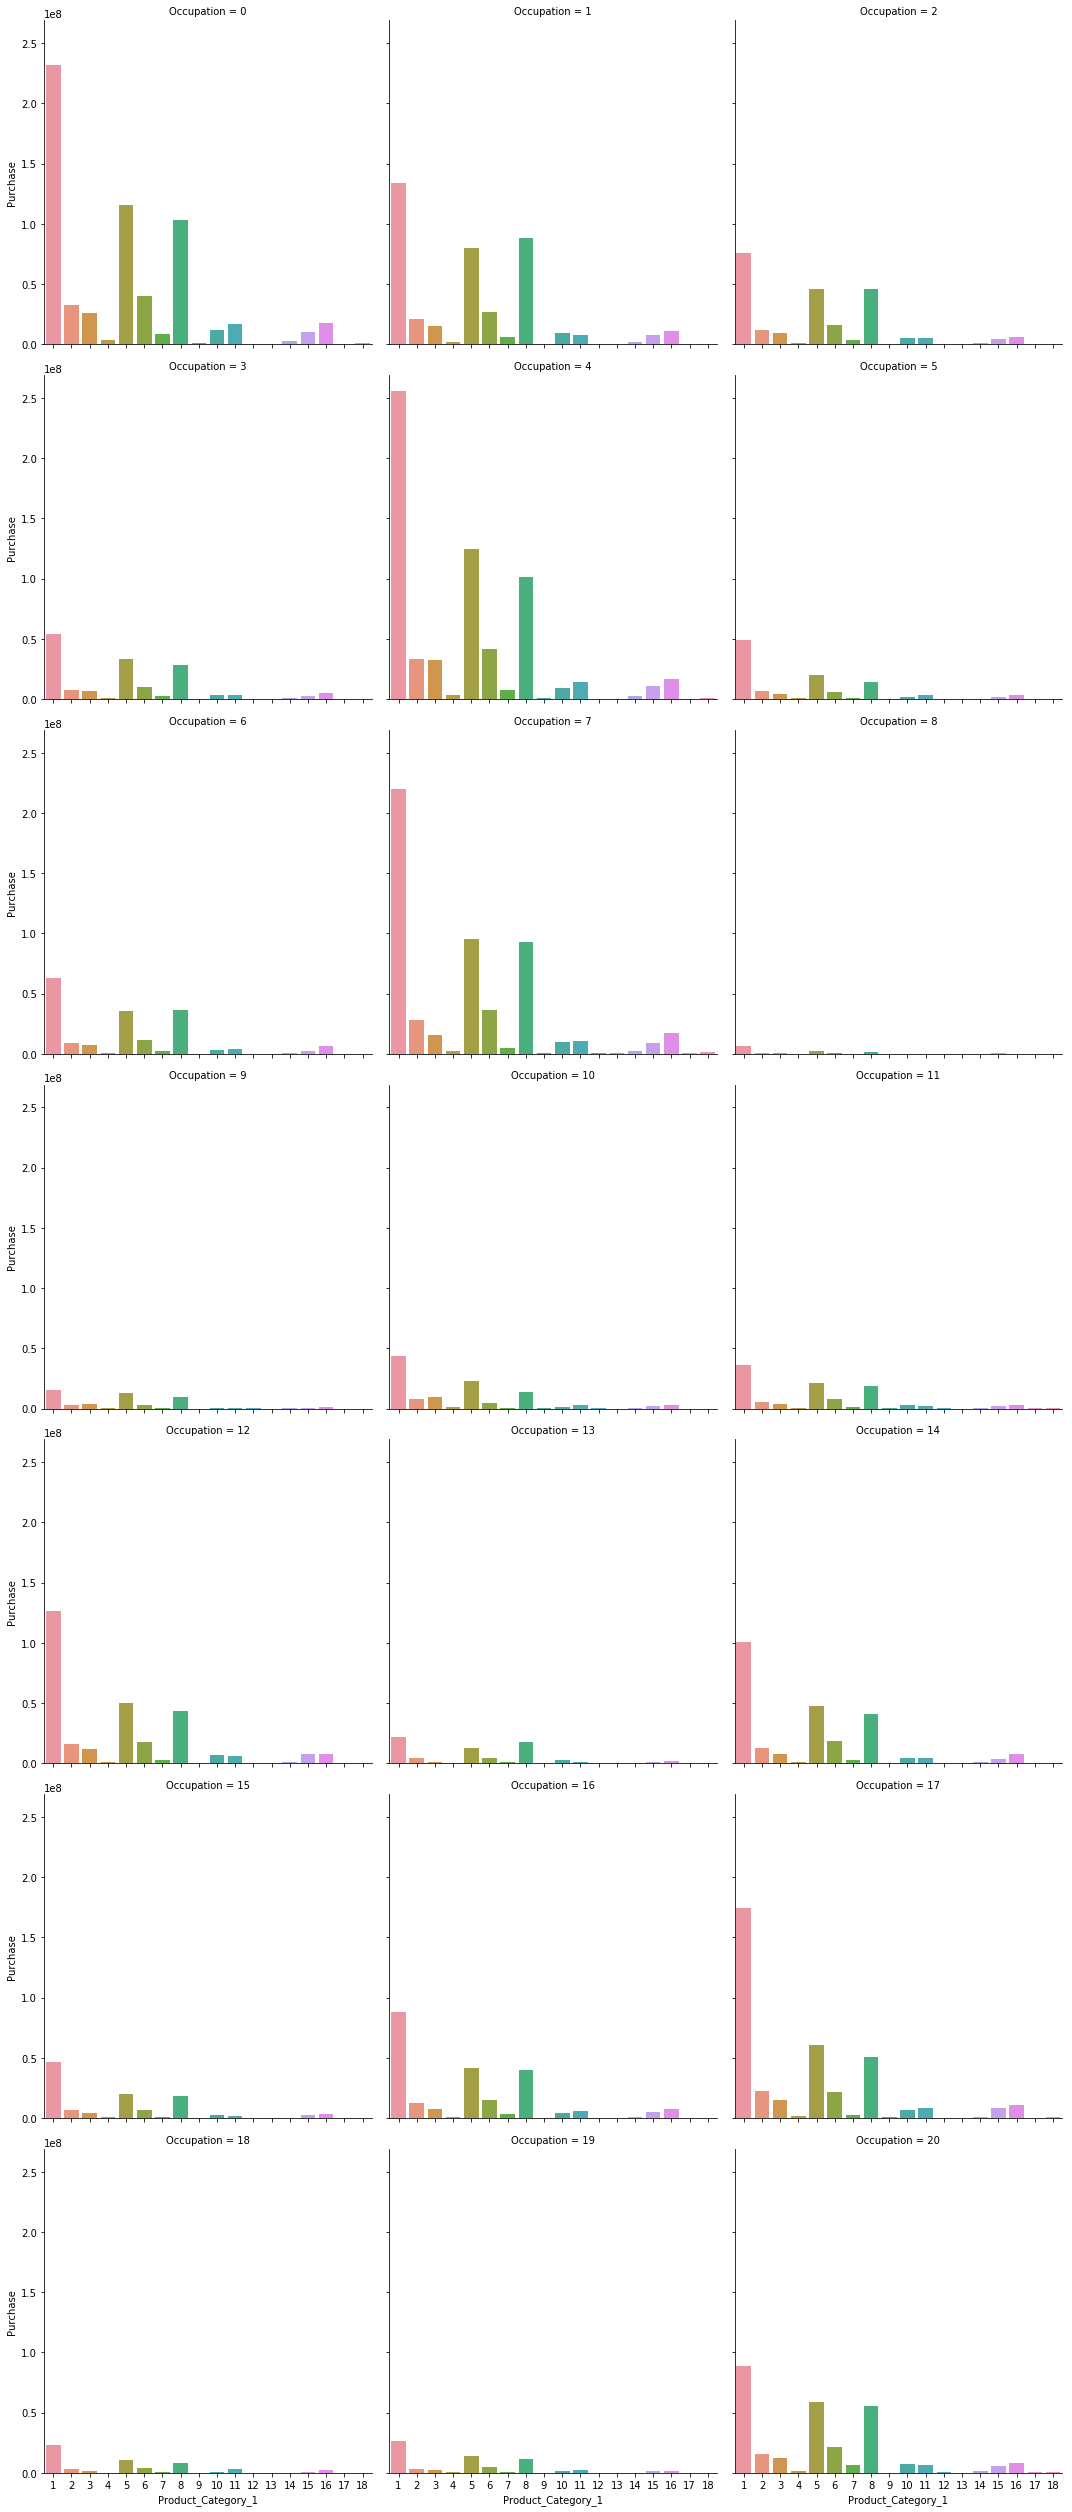

In [75]:
# Cantidad de dinero gastado por categoría, por cada ocupación.
sns.catplot(x='Product_Category_1', y='Purchase', col="Occupation", col_wrap=3, data=occupation_df, kind="bar")

Reflexión: Los datos muestran que las personas con ocupación 0, 1, 4, 7 y 17 gastan más dinero en productos de la categoría 1. Mientras que ninguna ocupación gasta en demasiado en productos de las categorías 4, 7, 9-18.

## City Category

In [19]:
# Cantidad total de compras realizadas por ciudad
df["City_Category"].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

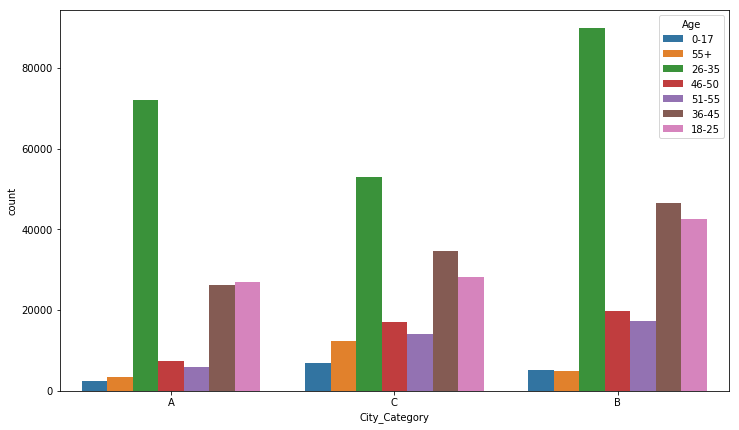

In [20]:
# Cantidad total de compras por edad y por ciudad
fig1, ax1 = plt.subplots(figsize = (12, 7))
sns.countplot(df['City_Category'], hue = df["Age"])

Reflexión: Personas del rango de edad de 17- y 55+, prefieren comprar en la ciudad C. Mientras que el resto prefiere comprar en la ciudad B.

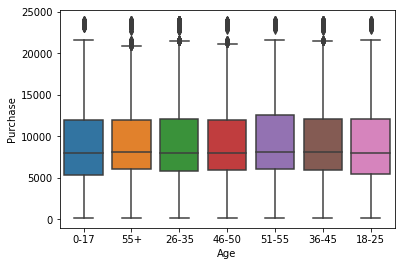

In [22]:
sns.boxplot('Age','Purchase', data = df)
plt.show()

In [202]:
import numpy as np
from sklearn.linear_model import LinearRegression

age_df = df.copy()
age_df.drop(["Product_Category_1", "Product_Category_2", "Product_Category_3"], axis=1, inplace=True)

predictors = ['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase']

reg = LinearRegression(normalize=True)
reg.fit(age_df[predictors], age_df['Age'])

y_pred = reg.predict(age_df[predictors])

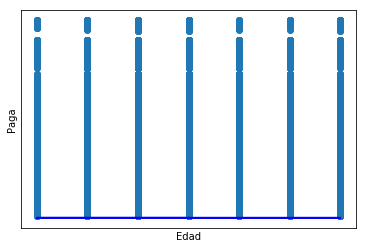

In [203]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='blue', linewidth=2)
plt.xlabel("Edad")
plt.ylabel('Paga')
plt.xticks(())
plt.yticks(())
plt.show()

Reflexión: Sin importar la edad, la cantidad de dinero gastado se mantiene constante.

## Stay In Current City Years

In [180]:
df["Stay_In_Current_City_Years"].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

## Marital Status

In [181]:
df["Marital_Status"].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

## Product Category

In [86]:
product_category_df = df.copy()
product_category_df['Product_Category_2'].fillna(-1, inplace=True)
product_category_df['Product_Category_3'].fillna(-1, inplace=True)
product_category_df["Product_Category_2"] = product_category_df["Product_Category_2"].astype(np.int64)
product_category_df["Product_Category_3"] = product_category_df["Product_Category_3"].astype(np.int64)
product_category_df.drop(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Stay_In_Current_City_Years'], axis=1, inplace=True)
product_category_df.sort_values(["Product_Category_1", "Product_Category_2", "Product_Category_3"], inplace=True)
product_category_df.head(15000)

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
86,1,-1,-1,19525
260,1,-1,-1,3978
519,1,-1,-1,7836
524,1,-1,-1,8289
533,1,-1,-1,11670
547,1,-1,-1,19464
549,1,-1,-1,19394
556,1,-1,-1,8310
635,1,-1,-1,15181
643,1,-1,-1,11971


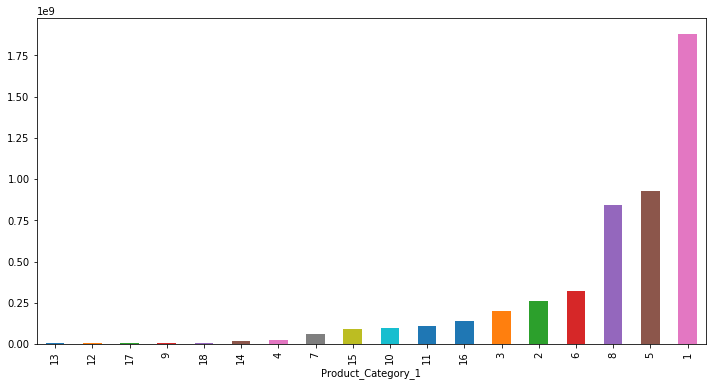

In [103]:
# Cantidad de dinero gastado por la categoría 1
plt_plot("Product_Category_1", "Purchase", "bar")

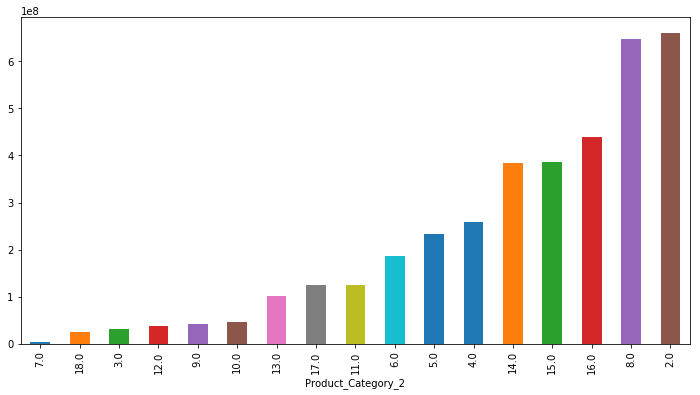

In [104]:
# Cantidad de dinero gastado por la categoría 2
plt_plot("Product_Category_2", "Purchase", "bar")

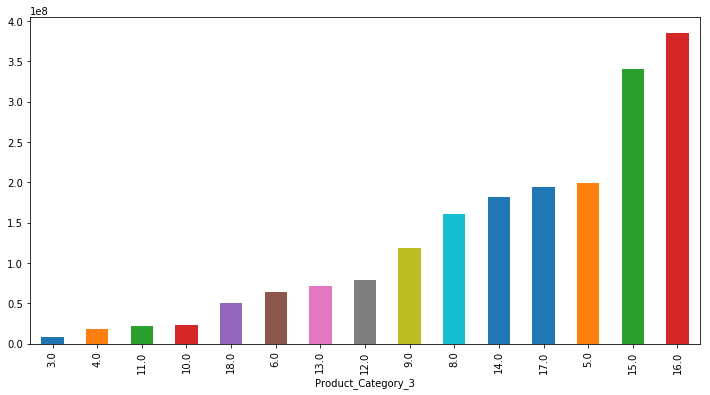

In [105]:
# Cantidad de dinero gastado por la categoría 3
plt_plot("Product_Category_3", "Purchase", "bar")

In [160]:
product_category_1_df = product_category_df.drop(["Product_Category_2", "Product_Category_3"], axis=1)
product_category_2_df = product_category_df.drop(["Product_Category_1", "Product_Category_3"], axis=1)
product_category_3_df = product_category_df.drop(["Product_Category_1", "Product_Category_2"], axis=1)

product_category_2_df = product_category_2_df[product_category_2_df["Product_Category_2"] != -1]
product_category_3_df = product_category_3_df[product_category_3_df["Product_Category_3"] != -1]

In [162]:
category_sum = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}
category_count = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}

def sum_category_purchases(dataframe, category_dict):
    for i in range(len(dataframe)):
        category_number = dataframe.iloc[i][0]
        category_dict[category_number] = category_dict.get(category_number) + dataframe.iloc[i][1]
        
        

In [163]:
# Cantidad de productos comprados por categoría
count_product_category_1_df = product_category_1_df.groupby("Product_Category_1").count().reset_index()
count_product_category_2_df = product_category_2_df.groupby("Product_Category_2").count().reset_index()
count_product_category_3_df = product_category_3_df.groupby("Product_Category_3").count().reset_index()

sum_category_purchases(count_product_category_1_df, category_count)
sum_category_purchases(count_product_category_2_df, category_count)
sum_category_purchases(count_product_category_3_df, category_count)
    
category_count

{1: 138353,
 2: 71980,
 3: 23284,
 4: 38632,
 5: 190846,
 6: 41233,
 7: 4283,
 8: 187574,
 9: 17409,
 10: 9721,
 11: 39678,
 12: 18388,
 13: 21194,
 14: 73779,
 15: 71131,
 16: 84447,
 17: 30146,
 18: 10368}

In [164]:
# Cantidad de dinero gastado por categoría
sum_product_category_1_df = product_category_1_df.groupby("Product_Category_1").sum().reset_index()
sum_product_category_2_df = product_category_2_df.groupby("Product_Category_2").sum().reset_index()
sum_product_category_3_df = product_category_3_df.groupby("Product_Category_3").sum().reset_index()

sum_category_purchases(sum_product_category_1_df, category_sum)
sum_category_purchases(sum_product_category_2_df, category_sum)
sum_category_purchases(sum_product_category_3_df, category_sum)
    
category_sum

{1: 1882666325,
 2: 924892852,
 3: 240622236,
 4: 302687109,
 5: 1359327029,
 6: 569799825,
 7: 64288708,
 8: 1650163809,
 9: 166037845,
 10: 168818801,
 11: 258286867,
 12: 122287396,
 13: 175213226,
 14: 586772150,
 15: 818885569,
 16: 967125644,
 17: 323158299,
 18: 84849167}

Reflexión: Los productos de categoría 1 son los más caros, por eso es que juntan más plata, no por que se venda más cantidad.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

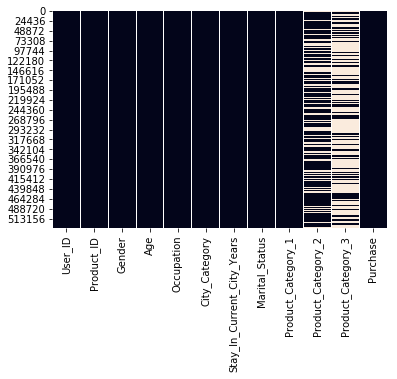

In [150]:
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

In [151]:
# Transform categorical to numerical data

In [165]:
df['Age'] = df['Age'].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6})

df['Gender'] = df['Gender'].map({'M': 0,'F': 1})

df['City_Category'] = df['City_Category'].map({'A': 0,'B': 1,'C': 2})

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})

In [166]:
# Clean null values (these are transformed to zero) and cast to int64

In [167]:
df['Product_Category_2'].fillna(-1, inplace=True)
df['Product_Category_3'].fillna(-1, inplace=True)
df["Product_Category_2"] = df["Product_Category_2"].astype(np.int64)
df["Product_Category_3"] = df["Product_Category_3"].astype(np.int64)

In [168]:
# Check new variable types

In [172]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(11)
memory usage: 45.1 MB


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,1,0,10,0,2,0,3,-1,-1,8370
1,1000001,1,0,10,0,2,0,1,6,14,15200
2,1000001,1,0,10,0,2,0,12,-1,-1,1422
3,1000001,1,0,10,0,2,0,12,14,-1,1057
4,1000002,0,6,16,2,4,0,8,-1,-1,7969


In [171]:
# Create training and testing vars (~20% test)

In [23]:
from sklearn.model_selection import train_test_split
target = df["Purchase"]
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)
# train, test = train_test_split(dfCopy, test_size=0.2)

In [24]:
print("Train set length: ", len(train))
print("Test set length: ", len(test))

NameError: name 'train' is not defined

In [ ]:
# Cross Validation

In [ ]:
# PCA for dimensionality reduction 

In [ ]:
from sklearn.decomposition import PCA
pc = PCA(4) # number of components wanted
principalComponents = pc.fit_transform(dfCopy)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ["component 1", "component 2", "component 3", "component 4"])

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(20)

In [ ]:
# fit a model
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
model.score(X_test, y_test)